# **Week 3 Task** - House Price Prediction
---
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries and read dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Cureya Internship/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* **CRIM**: Per capita crime rate by town.<br/>
* **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.<br/>
* **INDUS**: Proportion of non-retail business acres per town.<br/>
* **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).<br/>
* **NOX**: Nitric oxides concentration (parts per 10 million).<br/>
* **RM**: Average number of rooms per dwelling.<br/>
* **AGE**: Proportion of owner-occupied units built prior to 1940.<br/>
* **DIS**: Weighted distances to ﬁve Boston employment centers.<br/>
* **RAD**: Index of accessibility to radial highways.<br/>
* **TAX**: Full-value property-tax rate per \$10,000.<br/>
* **PTRATIO**: Pupil-teacher ratio by town.<br/>
* **B**: 1000(Bk−0.63)² where Bk is the proportion of blacks by town.<br/>
* **LSTAT**: Lower status of the population.<br/>
* **MEDV**: Median value of owner-occupied homes in \$1000s.<br/>

In [3]:
print('Shape of Dataset : ', df.shape)

Shape of Dataset :  (506, 14)


### **Data Preprocessing**

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Here, we can see that some data are misssing.<br/>
Now, check weather the missing values are at the same location.

In [7]:
df.index[df['CRIM'].isnull() == True]

Int64Index([ 53, 115, 183, 191, 192, 196, 229, 236, 241, 262, 288, 302, 369,
            393, 394, 409, 426, 430, 460, 465],
           dtype='int64')

In [8]:
df.index[df['CHAS'].isnull() == True]

Int64Index([  6,   9,  14,  43, 119, 152, 206, 240, 245, 254, 294, 367, 376,
            388, 401, 442, 450, 465, 479, 482],
           dtype='int64')

In [9]:
df.groupby('CRIM')['CRIM'].agg('count')

CRIM
0.00632     1
0.00906     1
0.01096     1
0.01301     1
0.01311     1
           ..
45.74610    1
51.13580    1
67.92080    1
73.53410    1
88.97620    1
Name: CRIM, Length: 484, dtype: int64

In [10]:
crim_avg = float('%.5f' % df['CRIM'].mean())
print(crim_avg)

3.61187


In [11]:
df.groupby('ZN')['ZN'].agg('count')

ZN
0.0      360
12.5      10
17.5       1
18.0       1
20.0      20
21.0       4
22.0      10
25.0      10
28.0       2
30.0       5
33.0       4
34.0       1
35.0       2
40.0       6
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      14
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: ZN, dtype: int64

In [12]:
df.groupby('INDUS')['INDUS'].agg('count')

INDUS
0.46       1
0.74       1
1.21       1
1.22       1
1.25       2
        ... 
18.10    127
19.58     28
21.89     14
25.65      6
27.74      5
Name: INDUS, Length: 76, dtype: int64

In [13]:
indus_avg = float('%.2f' % df['INDUS'].mean())
print(indus_avg)

11.08


In [14]:
df.groupby('CHAS')['CHAS'].agg('count')

CHAS
0.0    452
1.0     34
Name: CHAS, dtype: int64

In [15]:
df.groupby('AGE')['AGE'].agg('count')

AGE
2.9       1
6.2       1
6.5       1
6.6       2
6.8       1
         ..
98.8      4
98.9      3
99.1      1
99.3      1
100.0    42
Name: AGE, Length: 348, dtype: int64

In [16]:
age_avg = float('%.1f' % df['AGE'].mean())
print(age_avg)

68.5


In [17]:
df.groupby('LSTAT')['LSTAT'].agg('count')

LSTAT
1.73     1
1.92     1
1.98     1
2.47     1
2.87     1
        ..
34.37    1
34.41    1
34.77    1
36.98    1
37.97    1
Name: LSTAT, Length: 438, dtype: int64

Fill Nan values with appropriate data that is mean value.

In [18]:
lstat_avg = float('%.2f' % df['LSTAT'].mean())
print(lstat_avg)

12.72


In [19]:
df['CRIM'].fillna(crim_avg, inplace=True)
df['CRIM'].loc[53]

3.61187

In [20]:
df['INDUS'].fillna(indus_avg, inplace=True)
df['INDUS'].loc[36]

11.08

In [21]:
df['AGE'].fillna(age_avg, inplace=True)
df['AGE'].loc[74]

68.5

In [22]:
df['LSTAT'].fillna(lstat_avg, inplace=True)
df['LSTAT'].loc[4]

12.72

In [23]:
df['ZN'].fillna(method = 'ffill', inplace=True)
df['ZN'].loc[92]

0.0

In [24]:
df['CHAS'].fillna(0, inplace=True)
df['CHAS'].loc[6]

0.0

In [25]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.507905,11.083834,0.067194,0.554695,6.284634,68.517787,3.795043,9.549407,408.237154,18.455534,356.674032,12.715613,22.532806
std,8.545770,23.718793,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611870,12.500000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **Data Visualization**

Data distribution for every column

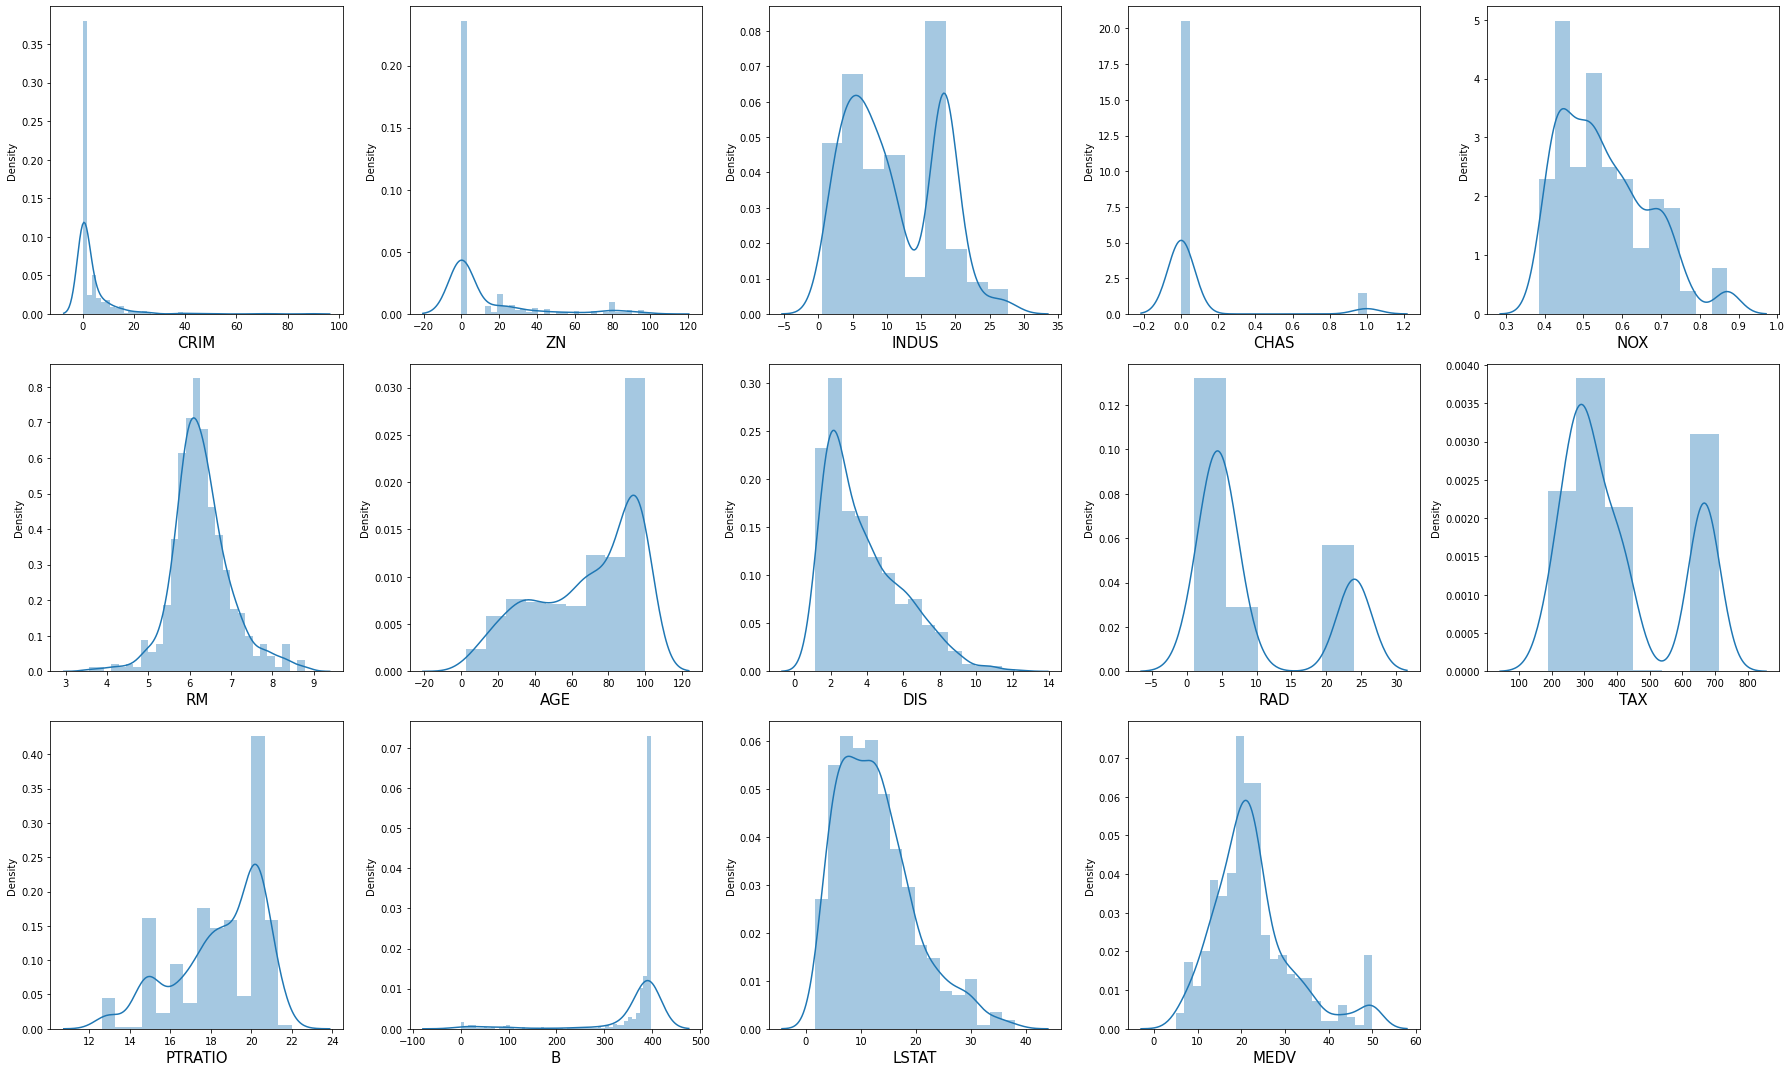

In [27]:
plt.figure(figsize = (25, 15))
plot_no = 1

for column in df:
    if plot_no <= 14:
        ax = plt.subplot(3, 5, plot_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plot_no += 1
    
plt.tight_layout()
plt.show()

Now let's plot price (MEDV) with remaining columns

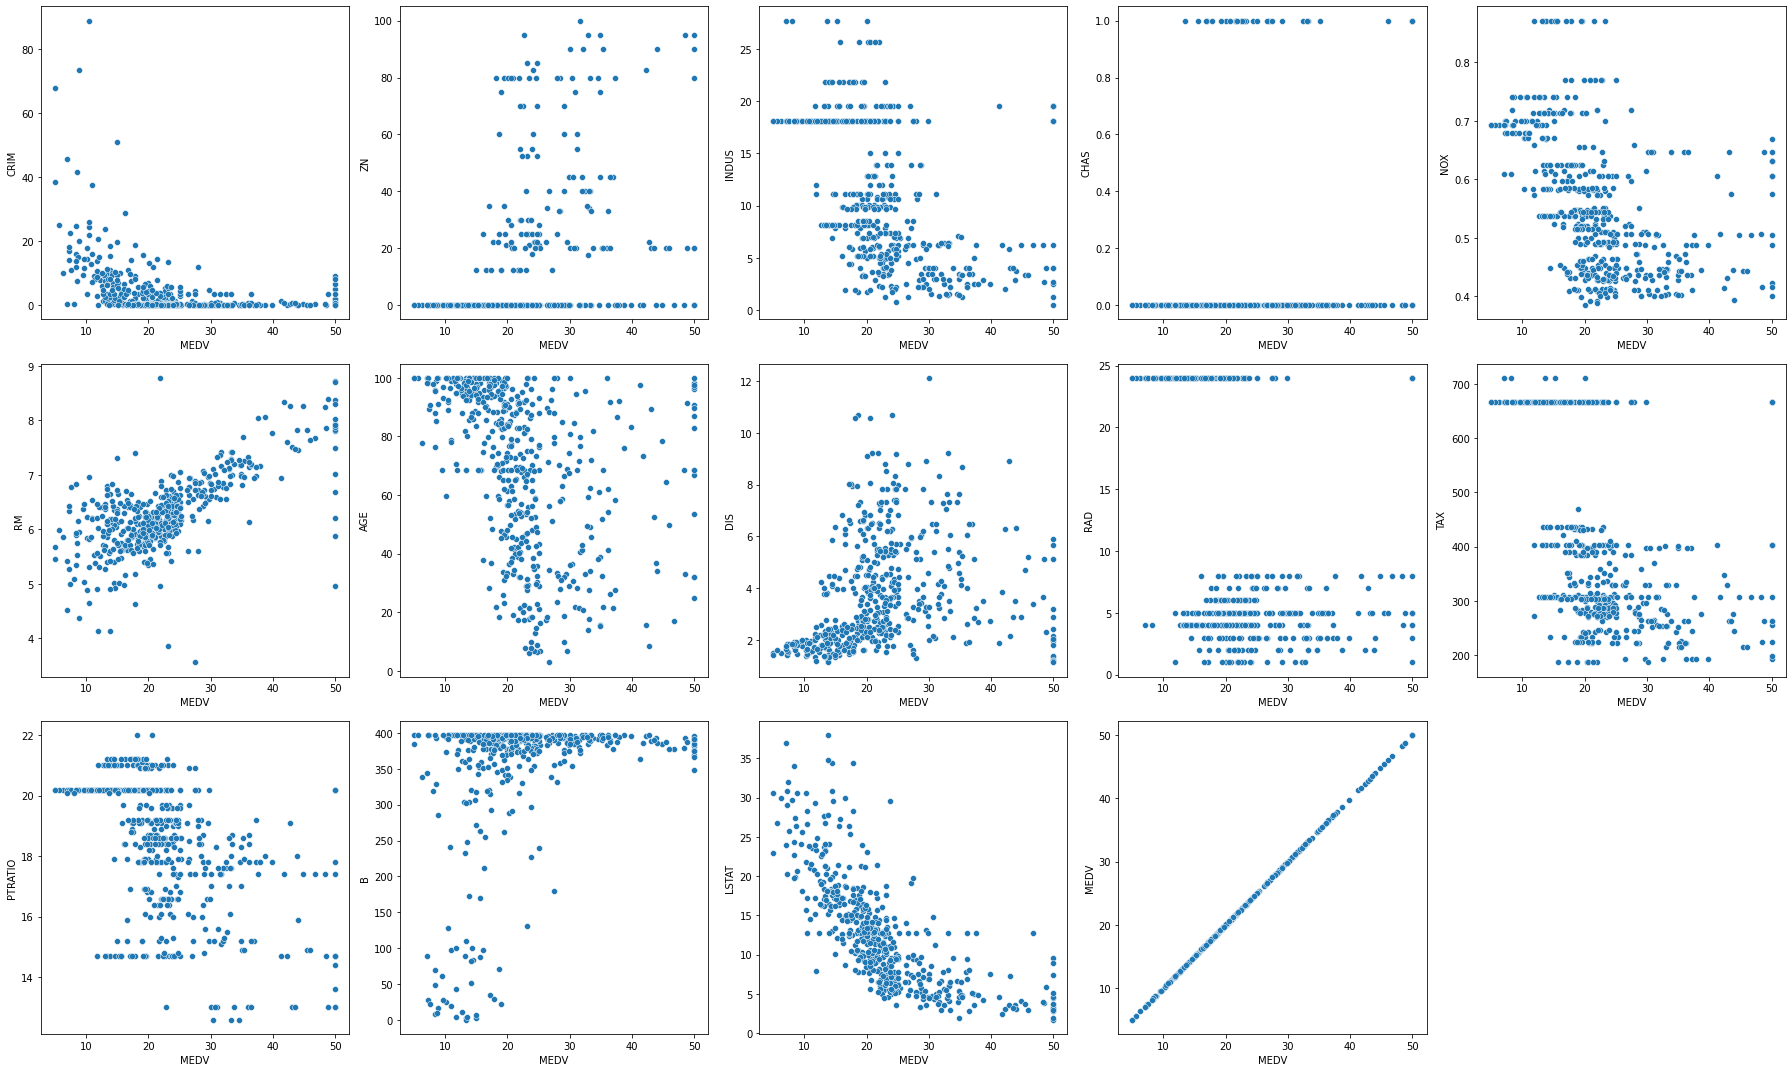

In [28]:
plt.figure(figsize = (25, 15))
plot_no = 1

for clm in df:
    if plot_no <= 14:
        ax = plt.subplot(3, 5, plot_no)
        sns.scatterplot(x = df['MEDV'], y = df[clm])      
    plot_no += 1

plt.tight_layout()
plt.show()

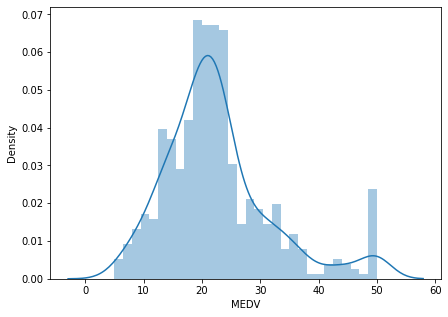

In [29]:
plt.figure(figsize = (7, 5))
sns.distplot(df['MEDV'], bins=30)
plt.show()

Using Box plot, finding outliers

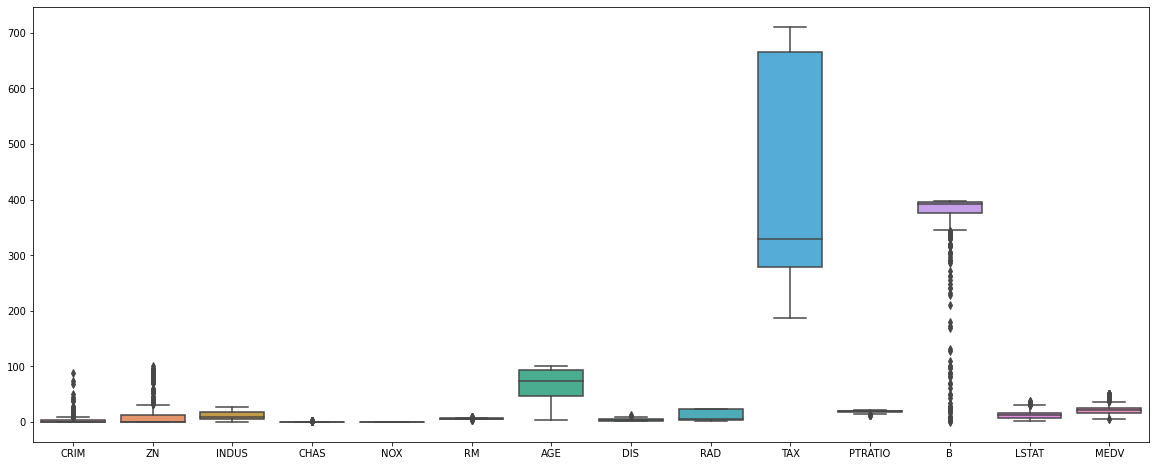

In [30]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

**Scaling the data**

In [31]:
X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.42232844,  0.27398188, -1.31098681, ..., -1.45900038,
         0.44105193, -1.10417169],
       [-0.41986983, -0.48566104, -0.59974732, ..., -0.30309415,
         0.44105193, -0.51037849],
       [-0.41987217, -0.48566104, -0.59974732, ..., -0.30309415,
         0.39642699, -1.23977351],
       ...,
       [-0.41595174, -0.48566104,  0.12643418, ...,  1.17646583,
         0.44105193, -1.00996412],
       [-0.41023214, -0.48566104,  0.12643418, ...,  1.17646583,
         0.4032249 , -0.89006356],
       [-0.41751546, -0.48566104,  0.12643418, ...,  1.17646583,
         0.44105193, -0.69022931]])

Multicollinearity using VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.720946,CRIM
1,2.189011,ZN
2,3.626180,INDUS
3,1.065879,CHAS
4,4.218727,NOX
5,1.853155,RM
6,2.744833,AGE
7,3.829812,DIS
8,7.367511,RAD
9,8.849799,TAX


Multicollinearity using Correlation Matrix

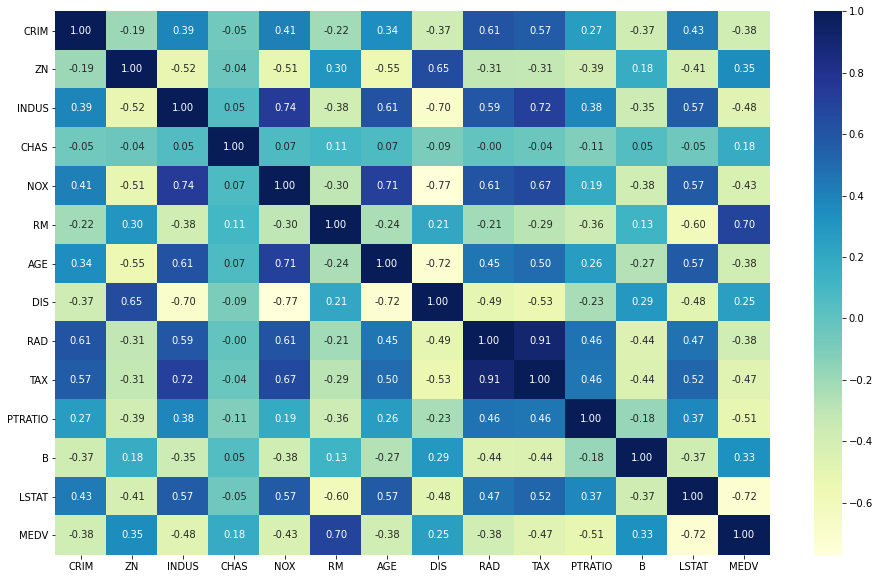

In [34]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', annot_kws = {'size' : 10}, cmap="YlGnBu")
plt.show()

### **Observations :**<br/>
* By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.72).

* Now check the multicolinearity, features RAD and TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and NOX which have a correlation of -0.77.

### **Splitting the dataset into training and testing data**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.26, random_state = 29)

### **Linear Regression**

In [36]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = lr_model.predict(X_train)

In [38]:
print('Training Accuracy : ',lr_model.score(X_train, y_train)*100)

Training Accuracy :  71.24842516265095


In [39]:
print('Testing Accuracy : ',lr_model.score(X_test, y_test)*100)

Testing Accuracy :  78.78425323488732


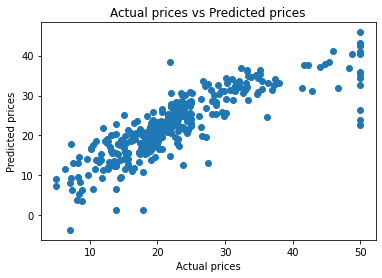

In [40]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

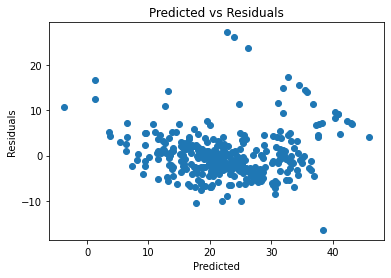

In [41]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

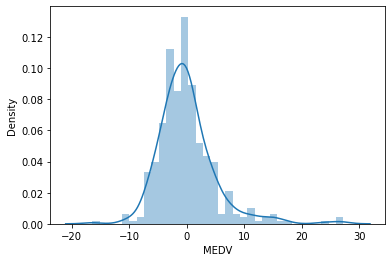

In [42]:
sns.distplot(y_train-y_pred)

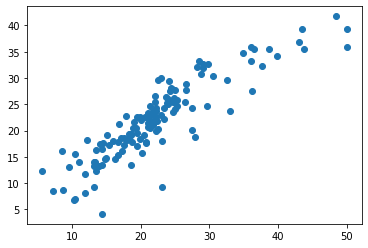

In [43]:
test_pred=lr_model.predict(X_test)

plt.scatter(y_test, test_pred)

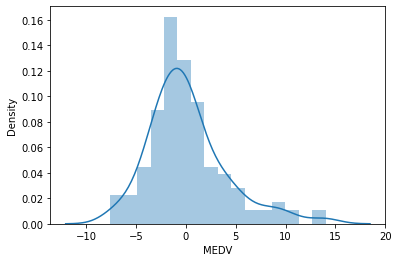

In [44]:
sns.distplot((y_test-test_pred))

### **Evaluation Metrics**

In [45]:
from sklearn import metrics
print('MSE : ',metrics.mean_absolute_error(y_test, test_pred))
print('MAE : ',metrics.mean_squared_error(y_test, test_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

MSE :  2.867894979326965
MAE :  15.532961297217602
RMSE :  3.9411878028352825


### **KNN**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 8)
from sklearn.neighbors import KNeighborsRegressor

In [47]:
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

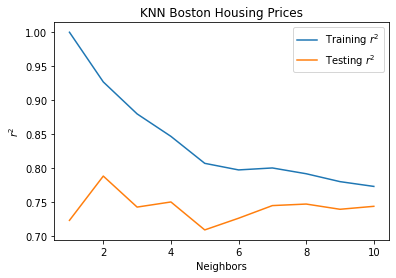

In [48]:
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
plt.plot(neighbors, train_score, label="Training $r^2$")
plt.plot(neighbors, test_score, label="Testing $r^2$")
plt.xlabel("Neighbors")
plt.ylabel("$r^2$")
plt.title("KNN Boston Housing Prices")
plt.legend()

In [49]:
print("Training r2 for 2 neihgbors: {:.2f}".format(train_score[1]*100))
print("Testing r2 for 2 neighbors: {:.2f}".format(test_score[1]*100))
assert max(test_score) == test_score[1]

Training r2 for 2 neihgbors: 92.68
Testing r2 for 2 neighbors: 78.79


In [50]:
print('MSE : ',metrics.mean_absolute_error(test_score, train_score))
print('MAE : ',metrics.mean_squared_error(test_score, train_score))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(test_score, train_score)))

MSE :  0.09899953822050997
MAE :  0.014674967665063376
RMSE :  0.12114028093521732
